In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 2:
1. Using different data for training and test data.
2. Exclude named entity. Replace NE into O

In [3]:
train_data_ = read_tsv('../raw dataset/all-tagged-280322-train-no-ne.tsv')
test_data_ = read_tsv('../raw dataset/all-tagged-080422-test-no-ne.tsv')


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.84      0.97      0.90     11123
          JV       0.89      0.82      0.85      4906
          EN       0.92      0.73      0.81      1746
           O       0.98      0.87      0.92      5492
   MIX-ID-EN       0.85      0.61      0.71       578
   MIX-ID-JV       0.95      0.39      0.55       204
   MIX-JV-EN       0.99      0.37      0.54       258

    accuracy                           0.88     24307
   macro avg       0.92      0.68      0.75     24307
weighted avg       0.89      0.88      0.88     24307



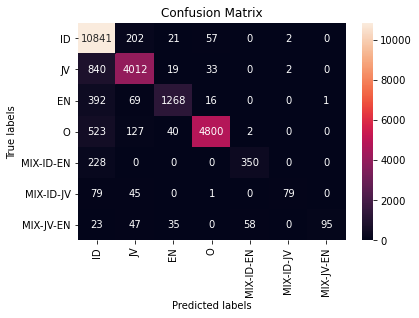


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.96      0.99      0.98     38006
          JV       0.93      0.93      0.93      8918
          EN       0.98      0.92      0.95      4877
           O       0.99      0.97      0.98     17110
   MIX-ID-EN       0.99      0.96      0.98      2107
   MIX-ID-JV       0.99      0.93      0.96       626
   MIX-JV-EN       0.97      0.93      0.95       525

    accuracy                           0.97     72169
   macro avg       0.97      0.95      0.96     72169
weighted avg       0.97      0.97      0.97     72169



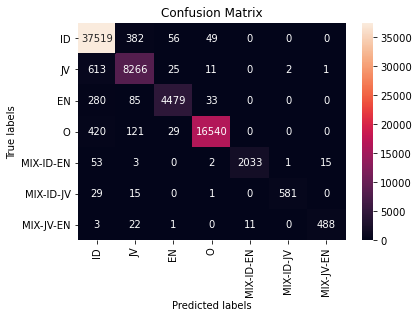


Top likely transitions:
O          -> O          4.78699
ID         -> O          4.25394
EN         -> O          4.16742
JV         -> O          4.01865
MIX-ID-EN  -> O          3.72671
MIX-JV-EN  -> O          3.48912
MIX-ID-JV  -> O          3.01544
EN         -> EN         1.89161
JV         -> JV         1.87697
MIX-JV-EN  -> JV         1.24571
JV         -> MIX-JV-EN  1.18940
ID         -> ID         1.09323
JV         -> MIX-ID-JV  0.81930
O          -> JV         0.80497
MIX-ID-JV  -> JV         0.79161
O          -> ID         0.76677
O          -> EN         0.75961
ID         -> MIX-ID-EN  0.73696
ID         -> EN         0.69564
EN         -> ID         0.37566

Top unlikely transitions:
MIX-ID-EN  -> MIX-ID-EN  -0.17803
MIX-JV-EN  -> MIX-JV-EN  -0.18574
MIX-JV-EN  -> EN         -0.22515
MIX-JV-EN  -> MIX-ID-JV  -0.24452
O          -> MIX-JV-EN  -0.26672
MIX-ID-JV  -> MIX-JV-EN  -0.27640
MIX-ID-JV  -> ID         -0.31244
ID         -> JV         -0.42746
MIX-ID-JV  -> EN

In [4]:
langid.train_test_result_(train_data=train_data_, test_data=test_data_, n_label=7, model_name='mod_080422_no_ne.pkl')

In [5]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)